<a href="https://colab.research.google.com/github/rashmi05pathak/CS6910_Assignment1/blob/main/EE20S051_CS21M050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#****PLease mount the drive according to your PRML folder location
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from matplotlib import pyplot
from keras.datasets import fashion_mnist

In [4]:
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [6]:
#Searching classes 0 to 9 from trainy
list_of_index = {}
for i in range(60000):
    if(list_of_index.get(trainy[i]) != True):
      list_of_index[trainy[i]] = i #class item train[i] found at index i  
 #CLass 0 to 9 is stored in the list_of_index dictionary 

In [7]:
list_of_index

{0: 1,
 1: 59996,
 2: 59993,
 3: 59997,
 4: 59990,
 5: 59999,
 6: 59988,
 7: 59992,
 8: 59994,
 9: 59978}

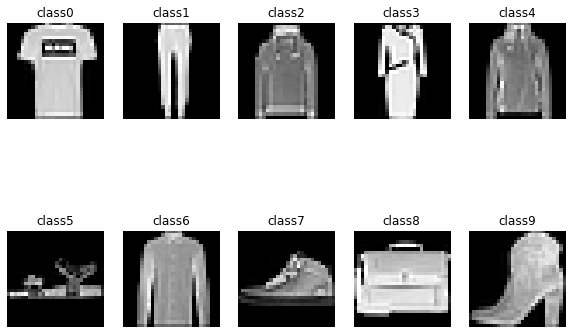

In [8]:
#Q1. Plotting fashion Mnist Dataset
# create figure
fig = pyplot.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 2
columns = 5
for i in range(10):
	# Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, i+1)
    j = list_of_index.get(i)
    # showing image
    pyplot.imshow(trainX[j],cmap = 'gray')
    pyplot.axis('off')
    pyplot.title("class"+ str(i))
# show the figure
pyplot.show()

In [9]:
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [18]:
trainX[0].shape

(28, 28, 1)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [27]:
#Initialize the model’s parameters
def initialize_parameters(X, n_h, n_y):
    np.random.seed(2) # we set up a seed so that output matches
    #Weight and bias 
    n_x = int(X[0].shape)
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)* 0.01
    b2 = np.zeros((n_y,1))
    #print(W1,b1,W2,b2)
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    return parameters

In [13]:
def forward_propagation(X, parameters): 
    # Retrieve each parameter from the dictionary "parameters" 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # Implement Forward Propagation to calculate A2
    Z1 = np.dot(W1,X)+b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1)+b2 
    A2 = Z2
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    return A2, cache

In [15]:
#implement mean squared error as output is real number
def mean_squared_error(y_true,y_pred):
    length = y_pred.shape[0]
    sum_error = 0
    for i in range(length):
        sum_error = sum_error + ((y_pred[i] - y_true[i])**2)
    return sum_error/length

In [ ]:
#Notation used meaning is as below
#dW1 = ∂J/∂W1
#db1 = ∂J/∂b1
#dW2 = ∂J/∂W2
#db2 = ∂J/∂b2
#A1*(1 - A1) is differentiation of sigmoid function
# Implementing backward_propagation
def backward_propagation(parameters, cache, X, Y):
   # m = 1 #one dimensional data
    # First, retrieve W1 and W2 from the dictionary "parameters". 
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2-Y
    dW2 = np.dot(dZ2,A1.T)
    db2 = np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*A1*(1 - A1) #sigmoid as activation function at hidden layer
    dW1 = np.dot(dZ1,X.T)
    db1 = np.sum(dZ1,axis=1,keepdims=True)
    grads = {"dW1": dW1,"db1": db1,"dW2": dW2,"db2": db2}
    return grads

In [ ]:
def update_parameters(parameters, grads, learning_rate): 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"] 
    db2 = grads["db2"]
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    return parameters

In [24]:
#****Neural Network method***********#
def nn_model(X, Y, n_h, num_iterations,learning_rate): 
    np.random.seed(3)
    parameters = initialize_parameters(X, n_h, 10) 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"] 
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        for x,y in zip(X,Y):
            A2, cache = forward_propagation(x, parameters)
            #grads = backward_propagation(parameters, cache, x, y)
            # Gradient descent parameter update.
            #parameters = update_parameters(parameters, grads,learning_rate) 
    return parameters

(60000, 28, 28, 1)

In [28]:
parameters1 = nn_model(trainX,trainy,1,100,0.1)

TypeError: ignored

In [ ]:
def predict(parameters,X):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"] 
    A2, cache = forward_propagation(X, parameters)
    return A2